# [Goulib](../notebook.ipynb).image
image processing made easy



In [1]:
from PIL import Image as PILImage
from Goulib.image import Image

lena_original=Image('../tests/data/lena.png') #Image can be init'ed from a path

In [2]:
# all PIL functions and methods are available
size=(128,128)
lena=lena_original.resize(size)
lena_gray=lena.grayscale()
lena_neg=-lena #some functions from PIL.ImageOps are implemented as methods and operators
lena_rgb=lena.split() # split RGB bands
images=[lena,lena_gray,lena_rgb[0],lena_rgb[1],lena_rgb[2],lena_neg]

## Rendering
Images have an HTML representation which can be embedded in Goulib.table.Table for example:

Lena,Gray,R,G,B,Negative
,,,,,

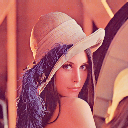
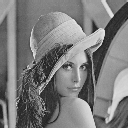
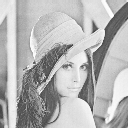
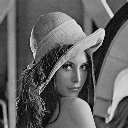
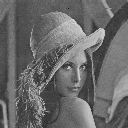
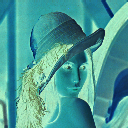

In [3]:
from Goulib.table import Table
Table([images],titles=['Lena','Gray','R','G','B','Negative'])

## Canvas and geometric transformations

,,,,,

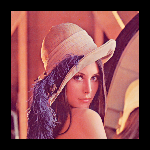
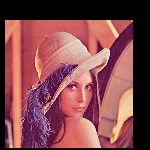
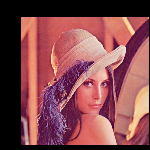
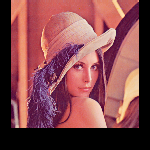
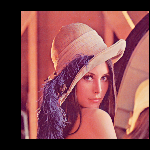
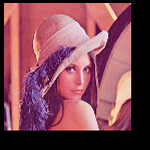

In [20]:
images=[[
    lena.expand((150,150)),       # centered by default
    lena.expand((150,150),5,20),  # dx,dy offset
    lena.expand((150,150),-1,-5), # negative offsets wr to lower right
    lena.expand((150,150),None,0),#centered in X, offset in Y
    lena.expand((150,150),-1,None),#centered in Y, offset in X
    ],[
    lena.expand((150,150),0,0).shift(3.25,2.5) #and we can do subpixel shifts !!!
]
Table([images])
    

,

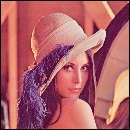
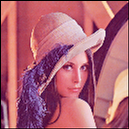

In [18]:
images=[
    lena.expand((130,130),1,1), # 1 pixel border
    lena.expand((129,129),0.5,0.5) #  half pixel border ... can you see the difference?
    ]
Table([images])

## Hash and Distances

"Image.average_hash" is implemented as [described here](http://www.hackerfactor.com/blog/index.php?/archives/432-Looks-Like-It.html)

this hash is independent of image mode or size, which makes it perfect for finding duplicates in hudge images collections

moreover, it can be used to compute "distance" between images very quickly:

In [7]:
hashes=map(hash,images)
dist=[im.dist(lena) for im in images]
hash(lena),hashes,dist

(-1079554793,
 [1523371118, -614736998, 1877863821, -640906662, 1877855871],
 [0.96875, 0.96875, 0.875, 0.84375, 0.90625])

notice that a distance of 1 means "totally different" while a distance of 2 means "inverted

## Slice, Subimage, Correlation

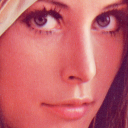

In [8]:
face=lena_original[246:374,225:353] # images can be sliced . Note the first coordinate is Y, then X
face

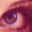

In [9]:
eye=face[3:35,-35:-3] # negative indexes are handy in some cases
eye

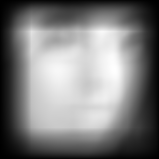

In [10]:
face.grayscale().correlation(eye.grayscale())

## Image Creation

,

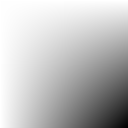
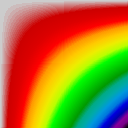

In [11]:
# Image can be created from standard Python lists and iterators, which are automatically normalized
# colormaps can be used to generate color images
from matplotlib import cm
a=[[-x*y for x in range(128)] for y in range(128)]
Table([[Image(a),Image(a,colormap=cm.spectral)]])

## Filtering

,,,,
,,,,

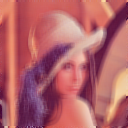
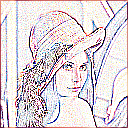
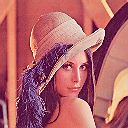
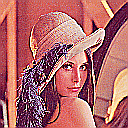
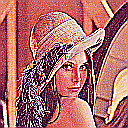
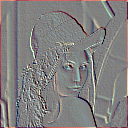
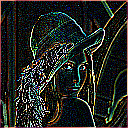
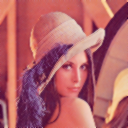
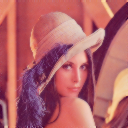
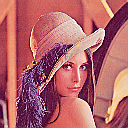

In [12]:
from PIL.ImageFilter import *
pilfilters=[BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE, EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN]
lena_filtered=[lena.filter(f) for f in pilfilters]
from Goulib.itertools2 import reshape
Table(reshape(lena_filtered,(0,5))) # nice way to limit table width, isn't it ?

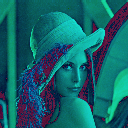

In [13]:
R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = lena_rgb[R].point(lambda i: 0 if i < 100 else 255)

# process the green band
out = lena_rgb[G].point(lambda i: i * 0.1)

# paste the processed band back, but only where red was < 100
lena_rgb[R].paste(out, None, mask)

# build a new multiband image
PILImage.merge(lena.mode, lena_rgb)

## scikit-image
advanced image processing thanks to http://scikit-image.org/

Table(len=3,titles=[],data=[[<Image path=None mode=RGB size=128x128>, <Image path=None mode=RGB size=128x128>, <Image path=None mode=RGB size=128x128>, <Image path=None mode=RGB size=128x128>, <Image path=None mode=RGB size=128x128>, <Image path=None mode=RGB size=128x128>], [<Image path=None mode=RGB size=128x128>, <Image path=None mode=RGB size=128x128>, <Image path=None mode=RGB size=128x128>, <Image path=None mode=RGB size=128x128>, <Image path=None mode=RGB size=128x128>, <Image path=None mode=RGB size=128x128>], [<Image path=None mode=RGB size=128x128>]])
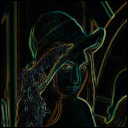
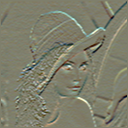
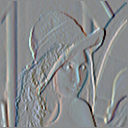
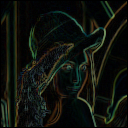
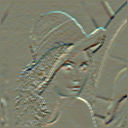
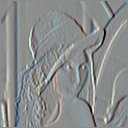
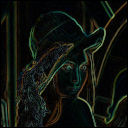
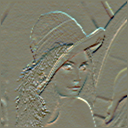
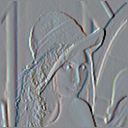
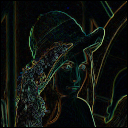
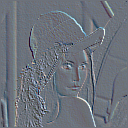
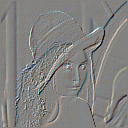
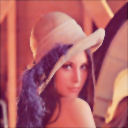

In [14]:
# filtering function can be passed directly to Image.filter method, and (RGB) channels are handled automatically
from skimage.filters import *
from skimage.restoration import denoise_bilateral
#demo with all filters that need no extra parameter
skifilters=[ sobel, sobel_h, sobel_v,
            prewitt, prewitt_h, prewitt_v,
            scharr, scharr_h, scharr_v,
            roberts, roberts_neg_diag, roberts_pos_diag,
            denoise_bilateral, ]
lena_filtered=[lena.filter(f) for f in skifilters]
Table(reshape(lena_filtered,(0,6)))

In [15]:
# the following filters need extra parameters:
from skimage.filters import LPIFilter2D, gabor_filter, gaussian_filter, median, rank_order, wiener
from skimage.filters import threshold_adaptive, threshold_isodata, threshold_li, threshold_otsu, threshold_yen
from skimage.feature import canny
from skimage.restoration import denoise_tv_bregman, denoise_tv_chambolle